# 영상입력 수치 예측 모델(컨볼루션 신경망 모델)

- 영상 데이터를 생성하여 고정된 지역에서 촬영된 영상으로부터 복잡도, 밀도 등을 수치화하는 문제 해결  

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

### 1. 데이터 셋 준비 
* 너비가 16, 높이가 16이고, 픽셀값을 0과 1을 가지는 영상 생성 
* 임의의 값이 주어지면, 그 값만큼 반복하여 영상 내에 1인 픽셀을 생성
* 임의의 값이 라벨값으로 지정했습니다.

In [2]:
width = 16
height = 16

# 이미지를 생성하는 함수 
def generate_image(points):
    
    img = np.zeros((width, height))
    pts = np.random.random((points, 2))
    
    for ipt in pts:
        img[int(ipt[0] * width), int(ipt[1] * height)] = 1
    
    return img.reshape(width, height, 1)

# 데이터 셋을 생성하는 함수 
def generate_dataset(samples):

    ds_x = []
    ds_y = []
    
    for it in range(samples):
        
        num_pt = np.random.randint(0, width * height)
        img = generate_image(num_pt)
        
        ds_y.append(num_pt)
        ds_x.append(img)
    
    return np.array(ds_x), np.array(ds_y).reshape(samples, 1)

### 2. 데이터셋 생성 
- 훈련셋을 1500개, 검증셋을 300개, 시험셋을 100개 생성

In [3]:
x_train, y_train = generate_dataset(1500)
x_val, y_val = generate_dataset(300)
x_test, y_test = generate_dataset(100)

* Dense 레이어는 일차원 벡터로 데이터를 입력 받기 때문에 2차원인 영상을 일차원 벡터로 변환함.

In [4]:
#x_train_1d = x_train.reshape(x_train.shape[0], width*height)
#x_val_1d = x_val.reshape(x_val.shape[0], width*height)
#x_test_1d = x_test.reshape(x_test.shape[0], width*height)

### 3. 모델 준비 

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               33024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

### 4. 모델 학습과정 설정하기

In [6]:
model.compile(loss='mse', optimizer='adam')

### 5.모델 학습시키기

In [7]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=1000, validation_data=(x_val, y_val))

Epoch 1/1000
47/47 [==============================] - 0s 6ms/step - loss: 11907.1943 - val_loss: 1690.7567
Epoch 2/1000
47/47 [==============================] - 0s 4ms/step - loss: 1461.9558 - val_loss: 1172.3126
Epoch 3/1000
47/47 [==============================] - 0s 4ms/step - loss: 1059.9664 - val_loss: 903.5342
Epoch 4/1000
47/47 [==============================] - 0s 4ms/step - loss: 787.3955 - val_loss: 682.2416
Epoch 5/1000
47/47 [==============================] - 0s 3ms/step - loss: 531.1279 - val_loss: 414.4782
Epoch 6/1000
47/47 [==============================] - 0s 3ms/step - loss: 342.0325 - val_loss: 294.1710
Epoch 7/1000
47/47 [==============================] - 0s 4ms/step - loss: 299.0870 - val_loss: 286.0921
Epoch 8/1000
47/47 [==============================] - 0s 3ms/step - loss: 269.7508 - val_loss: 225.2465
Epoch 9/1000
47/47 [==============================] - 0s 4ms/step - loss: 253.3504 - val_loss: 220.6887
Epoch 10/1000
47/47 [==============================] - 0s 

47/47 [==============================] - 0s 3ms/step - loss: 72.5358 - val_loss: 176.2243
Epoch 80/1000
47/47 [==============================] - 0s 3ms/step - loss: 69.9997 - val_loss: 149.8741
Epoch 81/1000
47/47 [==============================] - 0s 4ms/step - loss: 70.4849 - val_loss: 147.1372
Epoch 82/1000
47/47 [==============================] - 0s 4ms/step - loss: 69.3155 - val_loss: 165.9811
Epoch 83/1000
47/47 [==============================] - 0s 4ms/step - loss: 85.9602 - val_loss: 146.5502
Epoch 84/1000
47/47 [==============================] - 0s 4ms/step - loss: 68.7433 - val_loss: 145.8364
Epoch 85/1000
47/47 [==============================] - 0s 4ms/step - loss: 66.5766 - val_loss: 147.0003
Epoch 86/1000
47/47 [==============================] - 0s 4ms/step - loss: 66.7867 - val_loss: 158.1203
Epoch 87/1000
47/47 [==============================] - 0s 4ms/step - loss: 63.0193 - val_loss: 155.2513
Epoch 88/1000
47/47 [==============================] - 0s 4ms/step - loss: 64.

47/47 [==============================] - 0s 4ms/step - loss: 22.3674 - val_loss: 188.4241
Epoch 158/1000
47/47 [==============================] - 0s 4ms/step - loss: 22.0179 - val_loss: 177.6367
Epoch 159/1000
47/47 [==============================] - 0s 4ms/step - loss: 20.2532 - val_loss: 185.1101
Epoch 160/1000
47/47 [==============================] - 0s 4ms/step - loss: 19.9448 - val_loss: 199.8129
Epoch 161/1000
47/47 [==============================] - 0s 4ms/step - loss: 20.6357 - val_loss: 184.8818
Epoch 162/1000
47/47 [==============================] - 0s 4ms/step - loss: 22.1533 - val_loss: 179.8988
Epoch 163/1000
47/47 [==============================] - 0s 4ms/step - loss: 20.8924 - val_loss: 180.0551
Epoch 164/1000
47/47 [==============================] - 0s 4ms/step - loss: 18.6613 - val_loss: 181.4514
Epoch 165/1000
47/47 [==============================] - 0s 4ms/step - loss: 22.8393 - val_loss: 179.2944
Epoch 166/1000
47/47 [==============================] - 0s 4ms/step - 

47/47 [==============================] - 0s 4ms/step - loss: 3.4476 - val_loss: 191.0035
Epoch 236/1000
47/47 [==============================] - 0s 4ms/step - loss: 2.9369 - val_loss: 192.1540
Epoch 237/1000
47/47 [==============================] - 0s 4ms/step - loss: 2.6864 - val_loss: 194.1145
Epoch 238/1000
47/47 [==============================] - 0s 4ms/step - loss: 2.8186 - val_loss: 191.6136
Epoch 239/1000
47/47 [==============================] - 0s 4ms/step - loss: 2.1978 - val_loss: 192.2122
Epoch 240/1000
47/47 [==============================] - 0s 4ms/step - loss: 1.8725 - val_loss: 193.3114
Epoch 241/1000
47/47 [==============================] - 0s 4ms/step - loss: 3.2905 - val_loss: 205.6986
Epoch 242/1000
47/47 [==============================] - 0s 4ms/step - loss: 2.8984 - val_loss: 192.5158
Epoch 243/1000
47/47 [==============================] - 0s 4ms/step - loss: 2.0172 - val_loss: 193.2551
Epoch 244/1000
47/47 [==============================] - 0s 4ms/step - loss: 2.7

Epoch 314/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.7139 - val_loss: 195.5493
Epoch 315/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.6607 - val_loss: 198.1759
Epoch 316/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.4175 - val_loss: 199.0647
Epoch 317/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.5039 - val_loss: 199.3376
Epoch 318/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.9463 - val_loss: 203.4771
Epoch 319/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.9223 - val_loss: 198.2574
Epoch 320/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.6538 - val_loss: 197.8317
Epoch 321/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.5025 - val_loss: 200.5188
Epoch 322/1000
47/47 [==============================] - 0s 4ms/step - loss: 1.4289 - val_loss: 199.6606
Epoch 323/1000
47/47 [==============================] - 0s 4ms/s

Epoch 393/1000
47/47 [==============================] - 0s 4ms/step - loss: 1.6006 - val_loss: 201.1120
Epoch 394/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.8826 - val_loss: 197.8612
Epoch 395/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.4657 - val_loss: 196.8096
Epoch 396/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.4600 - val_loss: 197.6301
Epoch 397/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.2572 - val_loss: 198.0040
Epoch 398/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.6034 - val_loss: 199.0347
Epoch 399/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.3854 - val_loss: 197.7629
Epoch 400/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.2126 - val_loss: 198.1472
Epoch 401/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.1834 - val_loss: 197.6295
Epoch 402/1000
47/47 [==============================] - 0s 4ms/s

47/47 [==============================] - 0s 4ms/step - loss: 0.3915 - val_loss: 194.8107
Epoch 472/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.2486 - val_loss: 196.0777
Epoch 473/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.2452 - val_loss: 194.4577
Epoch 474/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.8053 - val_loss: 194.5506
Epoch 475/1000
47/47 [==============================] - ETA: 0s - loss: 1.977 - 0s 4ms/step - loss: 1.8598 - val_loss: 195.8321
Epoch 476/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.5371 - val_loss: 195.9726
Epoch 477/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.5137 - val_loss: 196.4012
Epoch 478/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.2774 - val_loss: 196.6672
Epoch 479/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.1378 - val_loss: 195.0056
Epoch 480/1000
47/47 [==============================] -

47/47 [==============================] - 0s 4ms/step - loss: 0.1164 - val_loss: 197.5067
Epoch 550/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.2242 - val_loss: 195.8860
Epoch 551/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.1620 - val_loss: 195.7352
Epoch 552/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.1078 - val_loss: 196.4031
Epoch 553/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.1932 - val_loss: 196.5791
Epoch 554/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.3556 - val_loss: 198.3641
Epoch 555/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.6601 - val_loss: 195.1934
Epoch 556/1000
47/47 [==============================] - 0s 4ms/step - loss: 1.1356 - val_loss: 193.8068
Epoch 557/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.5931 - val_loss: 195.4693
Epoch 558/1000
47/47 [==============================] - 0s 4ms/step - loss: 1.0

Epoch 628/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.5041 - val_loss: 196.8922
Epoch 629/1000
47/47 [==============================] - 0s 4ms/step - loss: 1.0267 - val_loss: 193.1276
Epoch 630/1000
47/47 [==============================] - 0s 4ms/step - loss: 4.9895 - val_loss: 193.9528
Epoch 631/1000
47/47 [==============================] - 0s 4ms/step - loss: 4.3485 - val_loss: 192.7536
Epoch 632/1000
47/47 [==============================] - 0s 3ms/step - loss: 2.2664 - val_loss: 191.2691
Epoch 633/1000
47/47 [==============================] - 0s 4ms/step - loss: 1.2854 - val_loss: 191.4807
Epoch 634/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.5955 - val_loss: 195.0991
Epoch 635/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.4268 - val_loss: 194.2927
Epoch 636/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.3741 - val_loss: 196.3178
Epoch 637/1000
47/47 [==============================] - 0s 4ms/s

Epoch 707/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.2194 - val_loss: 193.5155
Epoch 708/1000
47/47 [==============================] - ETA: 0s - loss: 0.223 - 0s 4ms/step - loss: 0.2039 - val_loss: 193.4979
Epoch 709/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.0999 - val_loss: 193.7348
Epoch 710/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.1089 - val_loss: 193.4420
Epoch 711/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.0893 - val_loss: 193.8409
Epoch 712/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.0767 - val_loss: 194.4440
Epoch 713/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.0637 - val_loss: 194.1227
Epoch 714/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.0409 - val_loss: 194.2992
Epoch 715/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.0930 - val_loss: 194.3022
Epoch 716/1000
47/47 [==================

47/47 [==============================] - 0s 4ms/step - loss: 0.2002 - val_loss: 193.5079
Epoch 786/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.2147 - val_loss: 192.7444
Epoch 787/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.6199 - val_loss: 193.9912
Epoch 788/1000
47/47 [==============================] - 0s 4ms/step - loss: 1.9141 - val_loss: 203.6879
Epoch 789/1000
47/47 [==============================] - 0s 4ms/step - loss: 1.4330 - val_loss: 194.1874
Epoch 790/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.4265 - val_loss: 198.4428
Epoch 791/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.9762 - val_loss: 193.9256
Epoch 792/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.5178 - val_loss: 193.2659
Epoch 793/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.5946 - val_loss: 193.0943
Epoch 794/1000
47/47 [==============================] - 0s 4ms/step - loss: 1.1

Epoch 864/1000
47/47 [==============================] - 0s 4ms/step - loss: 2.4465 - val_loss: 210.9407
Epoch 865/1000
47/47 [==============================] - 0s 4ms/step - loss: 11.2604 - val_loss: 195.8038
Epoch 866/1000
47/47 [==============================] - 0s 4ms/step - loss: 5.0364 - val_loss: 189.3645
Epoch 867/1000
47/47 [==============================] - 0s 4ms/step - loss: 2.3003 - val_loss: 190.7007
Epoch 868/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.7599 - val_loss: 190.8112
Epoch 869/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.6049 - val_loss: 190.3844
Epoch 870/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.2861 - val_loss: 192.6010
Epoch 871/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.2491 - val_loss: 194.7398
Epoch 872/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.3307 - val_loss: 192.7634
Epoch 873/1000
47/47 [==============================] - 0s 4ms/

Epoch 943/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.2004 - val_loss: 191.9284
Epoch 944/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.2539 - val_loss: 190.1181
Epoch 945/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.2525 - val_loss: 191.1843
Epoch 946/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.6147 - val_loss: 188.7122
Epoch 947/1000
47/47 [==============================] - 0s 4ms/step - loss: 2.1567 - val_loss: 194.1355
Epoch 948/1000
47/47 [==============================] - 0s 4ms/step - loss: 2.0945 - val_loss: 195.4175
Epoch 949/1000
47/47 [==============================] - 0s 4ms/step - loss: 3.1651 - val_loss: 191.9088
Epoch 950/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.7999 - val_loss: 189.3278
Epoch 951/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.5549 - val_loss: 192.6846
Epoch 952/1000
47/47 [==============================] - 0s 4ms/s

### 6. 학습과정 살펴보기

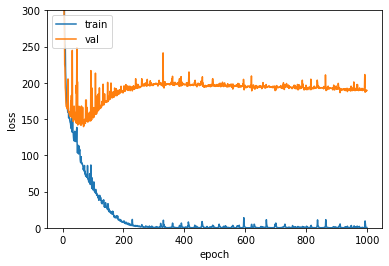

In [8]:
%matplotlib inline

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 300.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 7. 모델 평가하기

In [9]:
score = model.evaluate(x_test, y_test, batch_size=32)
print(score)

4/4 [==============================] - 0s 1ms/step - loss: 225.0259
225.02587890625


### 8. 모델 사용하기

In [10]:
yhat_test = model.predict(x_test, batch_size=32)
#print(yhat_test)

### 시각화

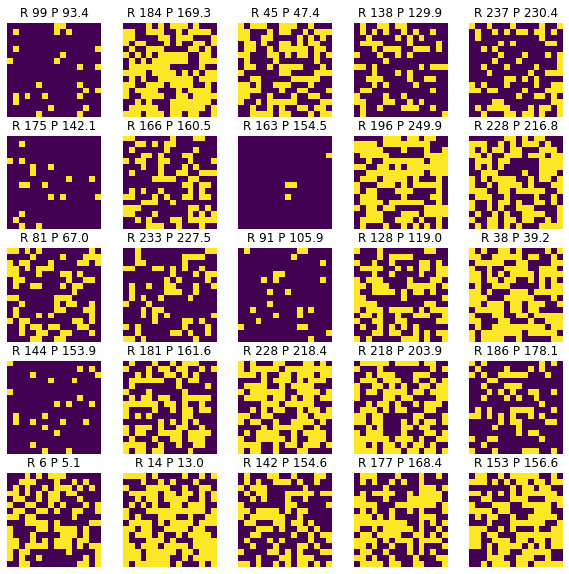

In [11]:
%matplotlib inline
        
plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_train[i].reshape(width, height))
    sub_plt.set_title('R %d P %.1f' % (y_test[i][0], yhat_test[i][0]))

plt.show()